<font face="微軟正黑體" size=6 color=#267BBB > AIEN03 18 徐子越 Machine Learning HW

<font face="微軟正黑體" size=6 color=#267BBB > ==========================

<font face="微軟正黑體" size=5 color=#A52A2A >
    題目1:整理出使用課程上或課程外學到的哪一些「前處理」、「分群」、「分類」技術

<font face="微軟正黑體" size=5 color=#267BBB > PreProcessing

1. Data Cleaning(資料清理)
    - Fill in missing values(填入遺漏值)
    - Identify or remove outliers(辨識並移除離群值)
    - Resolve inconsistencies(資料不一致)
2. Integration(資料整合)
    - Join tables
    - Different data sources: csv, json, xml, html, api, datebases
3. Transformation(資料轉換)
    - Normalization(正規化)
    - Aggregation(加總)
    - Feature Engineering(特徵值篩選)
4. Data discretization(資料切片)
    - data reduction(降維)

<font face="微軟正黑體" size=5 color=#267BBB > Clustering

    - K-means (k-平均演算法)
    - DBSCAN (Density-based spatial clustering of applications with noise, 聚類分析演算法)
    - Hierarchy (階層式分群法)
    --------------------------------------
    - Gaussian Mixture Model (高斯混合模型)

<font face="微軟正黑體" size=5 color=#267BBB > Classfication

    - KNN (K Nearest Neighbor, 最近鄰居法)
    - Decision Tree(決策樹)
    - Logistic Regression (邏輯迴歸)
    - Bayesian (貝氏分類器)
    - SVM (Support Vector Machine, 支援向量機)
    - Random Forest (隨機森林)
    - XGBoost
    ----------------------------------------------
    - AdaBoost (Adaptive Boosting, 自適應增強演算法)

<font face="微軟正黑體" size=6 color=#267BBB > ==========================

<font face="微軟正黑體" size=5 color=#A52A2A >
    題目2:自行計算出尚未取log的「真實total_price」跟「預測total_price」的rmse

<font face="微軟正黑體" size=4 color=#267BBB >ANS: Best iteration: [791]

<font face="微軟正黑體" size=4 color=#267BBB > train-rmse: 1.25767e+07	   valid-rmse: 1.49863e+07

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from collections import Counter
import urllib.request

from sklearn.neighbors import KNeighborsClassifier  ## KNN
from sklearn.linear_model import LogisticRegressionCV  ## logistic regression
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.svm import SVC  ## SVM

from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

import math
import string
import re

import xgboost

<font face="微軟正黑體" size=5 color=#267BBB > 讀入資料與前處理

In [14]:
if 'df_realestate.csv' not in os.listdir():
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate.csv'  
    urllib.request.urlretrieve(url, 'df_realestate.csv') 
    
if 'df_realestate_processed.csv' not in os.listdir():
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate_processed.csv'  
    urllib.request.urlretrieve(url, 'df_realestate_processed.csv')

In [15]:
# before preprocessing
file = os.path.join( 'df_realestate.csv')
df_realestate = pd.read_csv(file, encoding='big5')

# processed
path = "df_realestate_processed.csv"
df_realestate_processed = pd.read_csv(path)
X = df_realestate_processed.drop(["price_per_meter", "total_price"], axis=1)
Y = df_realestate_processed['total_price']

In [16]:
import urllib.request
if 'df_realestate_processed.csv' not in os.listdir():
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate_processed.csv'  
    urllib.request.urlretrieve(url, 'df_realestate_processed.csv')
    
# processed
path = "df_realestate_processed.csv"
df_realestate_processed = pd.read_csv(path)
X = df_realestate_processed.drop(["price_per_meter", "total_price"], axis=1)
Y = df_realestate_processed['total_price']


<font face="微軟正黑體" size=5 color=#267BBB > 不取log，直接拿原始資料做運算即可

In [17]:
X_train = X.iloc[:-1000]
Y_train = Y.iloc[:-1000]

X_valid = X.iloc[-1000:]
Y_valid = Y.iloc[-1000:]

<font face="微軟正黑體" size=5 color=#267BBB > 使用XGBoost處理資料

In [6]:
# Set our parameters for xgboost
params = {}

# 請填入以下參數: 
# 目標函數: 線性回歸
# 評價函數: rmse
# 學習速度: 0.01
# 最大深度: 5
# bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=50, verbose_eval=10)
#=============your works starts===============#
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.03  #可調整learning rate，過大過小都不好
params['max_depth'] = 3  #最大深度的層數
d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=10, verbose_eval=1)
Y_pred = bst.predict(xgboost.DMatrix(X_valid))
#==============your works ends================#


[00:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-rmse:1.4646e+08	valid-rmse:4.06844e+07
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[00:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[1]	train-rmse:1.43883e+08	valid-rmse:4.00973e+07
[00:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[2]	train-rmse:1.41369e+08	valid-rmse:3.95476e+07
[00:10:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[3]	train-rmse:1.38975e+08	valid-rmse:3.89528e+07
[00:10:05] C:\Users\Administrator\Desktop\xgboost\sr

[00:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[40]	train-rmse:7.80471e+07	valid-rmse:2.86066e+07
[00:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[41]	train-rmse:7.69516e+07	valid-rmse:2.84315e+07
[00:10:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[42]	train-rmse:7.58573e+07	valid-rmse:2.83088e+07
[00:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[43]	train-rmse:7.48019e+07	valid-rmse:2.81918e+07
[00:10:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[44]	train-rmse:7.37497e+07	valid-rmse:2.

[00:10:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[80]	train-rmse:4.68565e+07	valid-rmse:2.56502e+07
[00:10:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[81]	train-rmse:4.63371e+07	valid-rmse:2.56307e+07
[00:10:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[82]	train-rmse:4.58423e+07	valid-rmse:2.55833e+07
[00:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[83]	train-rmse:4.53474e+07	valid-rmse:2.53905e+07
[00:10:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[84]	train-rmse:4.48514e+07	valid-rmse:2.

[00:10:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[121]	train-rmse:3.20816e+07	valid-rmse:2.28042e+07
[00:10:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[122]	train-rmse:3.18435e+07	valid-rmse:2.28043e+07
[00:10:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[123]	train-rmse:3.16259e+07	valid-rmse:2.2758e+07
[00:10:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[124]	train-rmse:3.14129e+07	valid-rmse:2.27398e+07
[00:10:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[125]	train-rmse:3.12057e+07	valid-rms

[00:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[161]	train-rmse:2.55215e+07	valid-rmse:2.11262e+07
[00:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[162]	train-rmse:2.54035e+07	valid-rmse:2.10648e+07
[00:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[163]	train-rmse:2.52932e+07	valid-rmse:2.10643e+07
[00:10:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[164]	train-rmse:2.51843e+07	valid-rmse:2.10333e+07
[00:10:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[165]	train-rmse:2.50911e+07	valid-rms

[00:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[201]	train-rmse:2.23873e+07	valid-rmse:2.01822e+07
[00:10:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[202]	train-rmse:2.23221e+07	valid-rmse:2.01686e+07
[00:10:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[203]	train-rmse:2.22493e+07	valid-rmse:2.01552e+07
[00:10:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[204]	train-rmse:2.22072e+07	valid-rmse:2.01387e+07
[00:10:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[205]	train-rmse:2.21511e+07	valid-rm

[00:10:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[242]	train-rmse:2.04492e+07	valid-rmse:1.95949e+07
[00:10:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[243]	train-rmse:2.04131e+07	valid-rmse:1.95469e+07
[00:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[244]	train-rmse:2.03553e+07	valid-rmse:1.95469e+07
[00:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[245]	train-rmse:2.03114e+07	valid-rmse:1.95474e+07
[00:10:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[246]	train-rmse:2.02575e+07	valid-rm

[00:11:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[283]	train-rmse:1.84903e+07	valid-rmse:1.89655e+07
[00:11:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[284]	train-rmse:1.84533e+07	valid-rmse:1.89634e+07
[00:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[285]	train-rmse:1.84163e+07	valid-rmse:1.89634e+07
[00:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[286]	train-rmse:1.83788e+07	valid-rmse:1.89559e+07
[00:11:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[287]	train-rmse:1.83371e+07	valid-rmse:

[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[324]	train-rmse:1.72019e+07	valid-rmse:1.81672e+07
[00:11:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[325]	train-rmse:1.71663e+07	valid-rmse:1.81065e+07
[00:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[326]	train-rmse:1.71386e+07	valid-rmse:1.81075e+07
[00:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[327]	train-rmse:1.71099e+07	valid-rmse:1.81013e+07
[00:11:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[328]	train-rmse:1.70806e+07	valid-rmse:

[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[365]	train-rmse:1.62768e+07	valid-rmse:1.73666e+07
[00:11:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[366]	train-rmse:1.62637e+07	valid-rmse:1.73665e+07
[00:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[367]	train-rmse:1.62557e+07	valid-rmse:1.73665e+07
[00:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[368]	train-rmse:1.62377e+07	valid-rmse:1.73539e+07
[00:11:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[369]	train-rmse:1.62299e+07	valid-rmse

[00:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[406]	train-rmse:1.56789e+07	valid-rmse:1.70059e+07
[00:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[407]	train-rmse:1.56597e+07	valid-rmse:1.70059e+07
[00:11:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[408]	train-rmse:1.56453e+07	valid-rmse:1.70057e+07
[00:11:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[409]	train-rmse:1.56235e+07	valid-rmse:1.70107e+07
[00:11:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[410]	train-rmse:1.56069e+07	valid-rms

[00:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[447]	train-rmse:1.51428e+07	valid-rmse:1.68019e+07
[00:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[448]	train-rmse:1.51288e+07	valid-rmse:1.678e+07
[00:11:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[449]	train-rmse:1.51056e+07	valid-rmse:1.67566e+07
[00:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[450]	train-rmse:1.50956e+07	valid-rmse:1.67463e+07
[00:11:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[451]	train-rmse:1.50813e+07	valid-rmse

[00:11:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[488]	train-rmse:1.46791e+07	valid-rmse:1.64274e+07
[00:11:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[489]	train-rmse:1.46717e+07	valid-rmse:1.64274e+07
[00:11:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[490]	train-rmse:1.46675e+07	valid-rmse:1.64274e+07
[00:11:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[491]	train-rmse:1.46535e+07	valid-rmse:1.64289e+07
[00:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[492]	train-rmse:1.46376e+07	valid-rms

[00:11:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[529]	train-rmse:1.42719e+07	valid-rmse:1.6056e+07
[00:11:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[530]	train-rmse:1.42645e+07	valid-rmse:1.6029e+07
[00:11:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[531]	train-rmse:1.42524e+07	valid-rmse:1.60283e+07
[00:11:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[532]	train-rmse:1.42475e+07	valid-rmse:1.60283e+07
[00:11:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[533]	train-rmse:1.42387e+07	valid-rmse:1

[00:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[570]	train-rmse:1.38801e+07	valid-rmse:1.57149e+07
[00:12:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[571]	train-rmse:1.38637e+07	valid-rmse:1.56922e+07
[00:12:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[572]	train-rmse:1.38577e+07	valid-rmse:1.56945e+07
[00:12:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[573]	train-rmse:1.38449e+07	valid-rmse:1.56955e+07
[00:12:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[574]	train-rmse:1.38355e+07	valid-rms

[00:12:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[611]	train-rmse:1.3565e+07	valid-rmse:1.54741e+07
[00:12:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[612]	train-rmse:1.3562e+07	valid-rmse:1.54636e+07
[00:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[613]	train-rmse:1.3551e+07	valid-rmse:1.54636e+07
[00:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[614]	train-rmse:1.35474e+07	valid-rmse:1.54558e+07
[00:12:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[615]	train-rmse:1.35427e+07	valid-rmse:1

[00:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[651]	train-rmse:1.32988e+07	valid-rmse:1.52752e+07
[00:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[652]	train-rmse:1.32926e+07	valid-rmse:1.52744e+07
[00:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[653]	train-rmse:1.32901e+07	valid-rmse:1.52745e+07
[00:12:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[654]	train-rmse:1.32768e+07	valid-rmse:1.52754e+07
[00:12:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[655]	train-rmse:1.32683e+07	valid-rm

[00:12:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[691]	train-rmse:1.30656e+07	valid-rmse:1.51732e+07
[00:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[692]	train-rmse:1.30611e+07	valid-rmse:1.51596e+07
[00:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[693]	train-rmse:1.30533e+07	valid-rmse:1.51588e+07
[00:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[694]	train-rmse:1.30449e+07	valid-rmse:1.51576e+07
[00:12:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[695]	train-rmse:1.30427e+07	valid-rm

[00:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[732]	train-rmse:1.28449e+07	valid-rmse:1.51145e+07
[00:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[733]	train-rmse:1.28363e+07	valid-rmse:1.5114e+07
[00:12:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[734]	train-rmse:1.28345e+07	valid-rmse:1.51132e+07
[00:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[735]	train-rmse:1.28309e+07	valid-rmse:1.5123e+07
[00:12:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[736]	train-rmse:1.28272e+07	valid-rmse:

[00:12:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[773]	train-rmse:1.26526e+07	valid-rmse:1.50158e+07
[00:12:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[774]	train-rmse:1.26434e+07	valid-rmse:1.50037e+07
[00:12:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[775]	train-rmse:1.26410e+07	valid-rmse:1.50036e+07
[00:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[776]	train-rmse:1.26362e+07	valid-rmse:1.50061e+07
[00:12:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[777]	train-rmse:1.26326e+07	valid-rms

<font face="微軟正黑體" size=5 color=#267BBB > 藉由資料產生圖表及模型

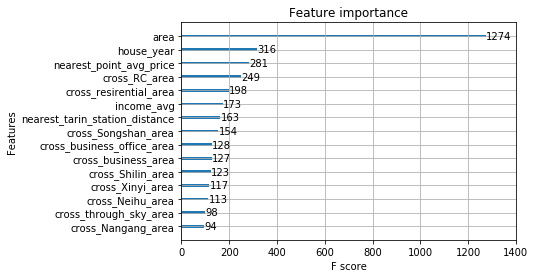

In [8]:
# 請使用 xgboost.plot_importance，並設定max_num_features=10
#!=============your works starts===============!#
xgboost.plot_importance(bst, max_num_features=15)
#這裡可以設定要比較的features數量

#!==============your works ends================!#

plt.show()

In [10]:
df_result = pd.DataFrame()

# 1. 使用X_valid去評價此模型
# 2. 使用 ['predict', 'truth', 'error'] 三個欄位的DataFrame去使決畫呈現預測結果
#    (1). 請注意與測結果(Y_pred)與真實值(Y_valid)都必須取exp方能反映實際情況
#    (2). error 請使用計算np.abs(predict-truth)/truth計算誤差百分比
#=============your works starts===============#
Y_pred = bst.predict(xgboost.DMatrix(X_valid))
# df_result['predict'] = np.exp(Y_pred)  #不取log所以也不用還原
df_result['predict'] = Y_pred

df_result['truth'] = list(Y_valid)
df_result['error'] = df_result.apply(lambda x:np.abs(x['predict'] - x['truth']) / x['truth'], axis=1)
df_result_sort = df_result.sort_values('truth')
#==============your works ends================#

df_result.head()

,predict,truth,error
0,17069822.0,15880006.78,0.074925
1,14878526.0,10999982.00,0.352595
2,29490054.0,28199982.04,0.045747
3,29143720.0,21920043.69,0.329547
4,5488941.5,3220663.36,0.704289


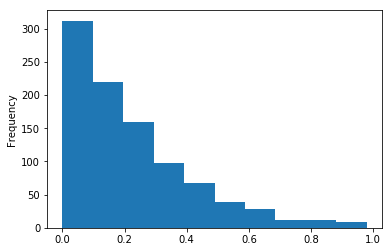

In [11]:
# 請使用df_result_sort濾掉error大於1的部分畫出error的分布圖
#!=============your works starts===============!#
df_result_sort.loc[df_result_sort['error'] < 1, 'error'].plot('hist')
#!==============your works ends================!#

plt.show()

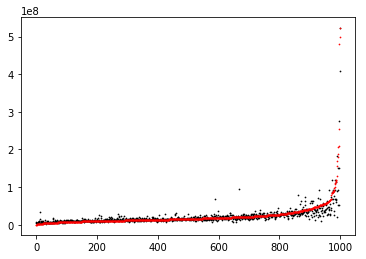

In [12]:
# 請使用plt.scatter，以0~len(df_result)作為x，預測值(黑色)與實際值(紅色)作為y。
#!=============your works starts===============!#
plt.scatter(range(len(df_result)), df_result_sort['predict'].values, color='black', s=0.5)
plt.scatter(range(len(df_result)), df_result_sort['truth'].values, color='red', s=0.5)
#!==============your works ends================!#

plt.show()